In [1]:
#Importing all the neccessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [2]:
#Loading the required data
df=pd.read_csv('diabetes_data.csv')
pd.set_option('display.max_columns',30)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [4]:
#Assessing for missing values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [5]:
#Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


In [6]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [7]:
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Diabetes', 'HighBP', 'Stroke']

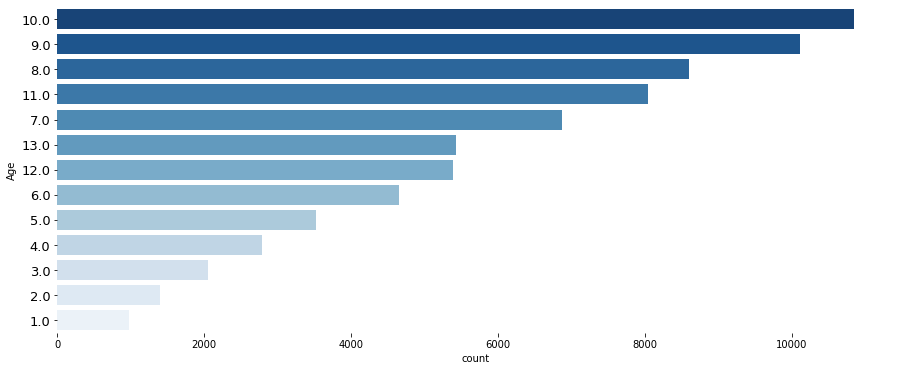

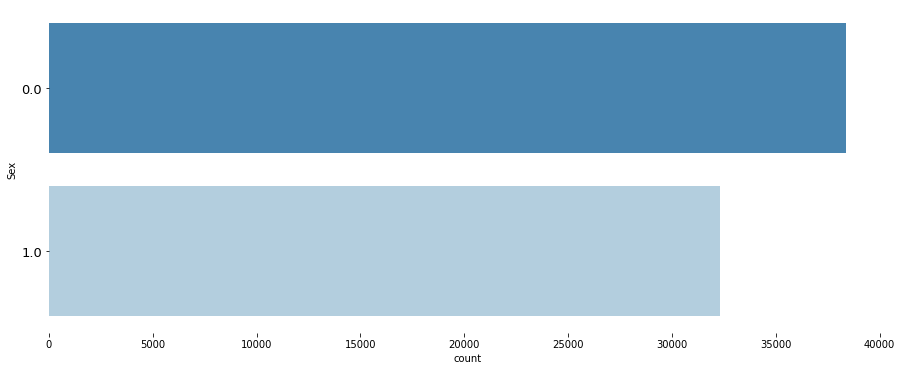

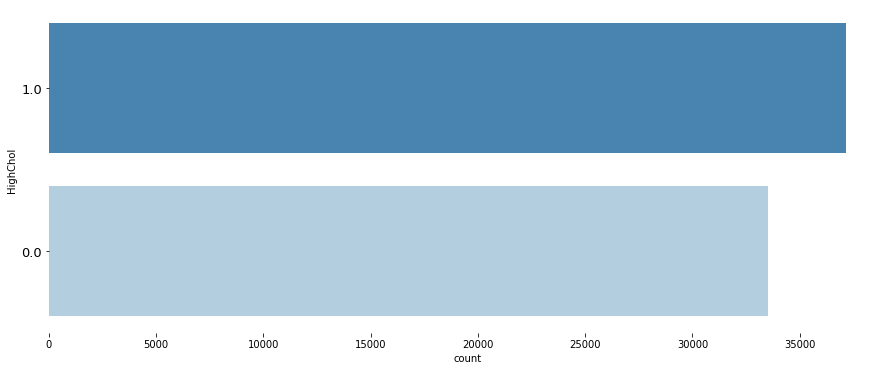

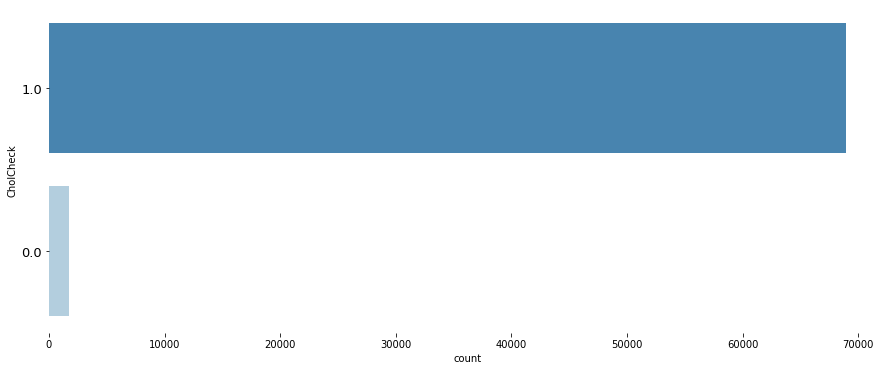

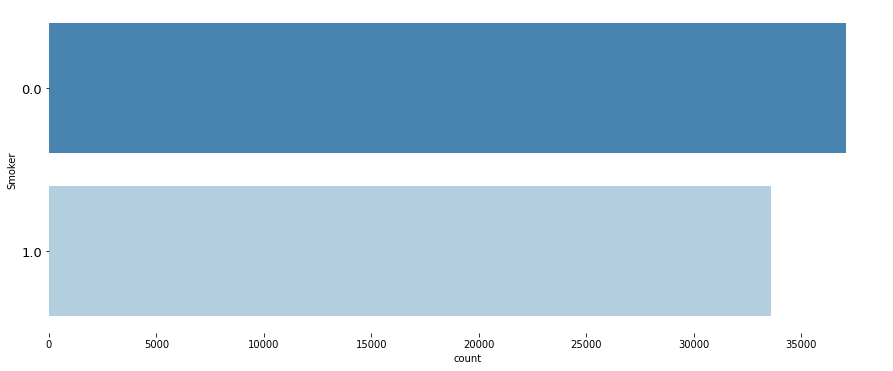

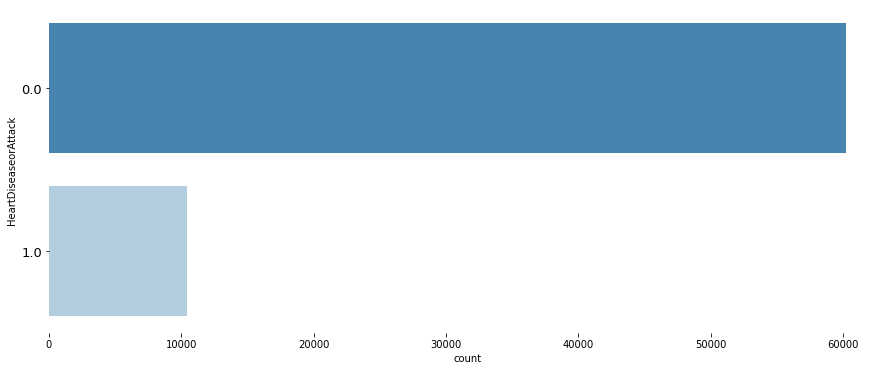

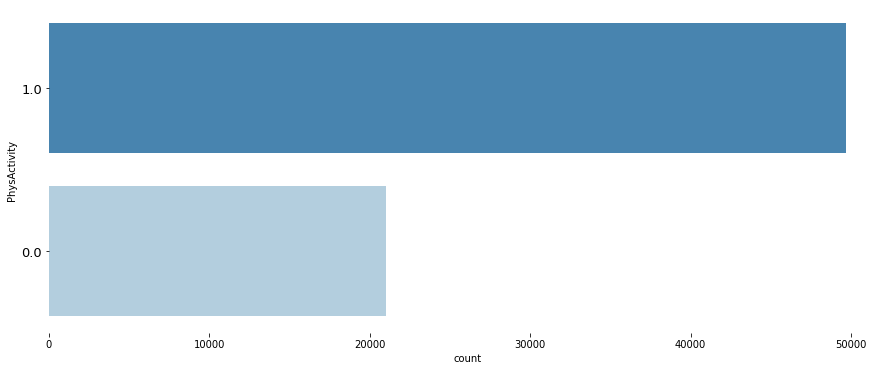

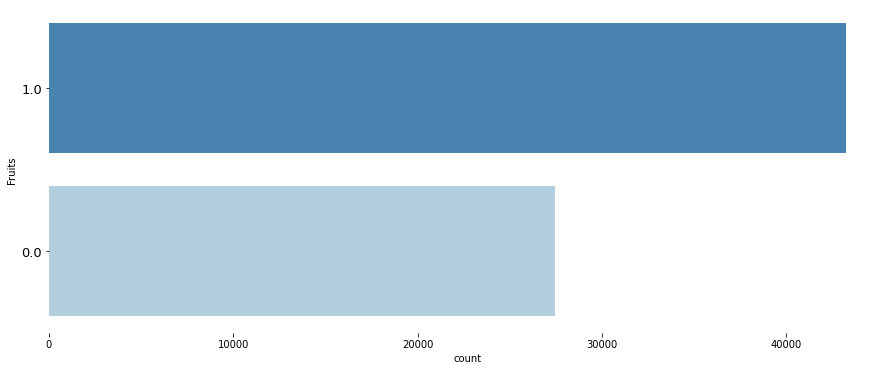

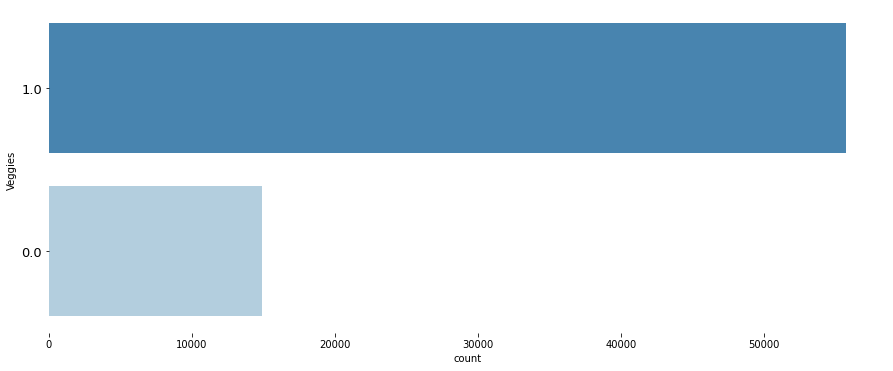

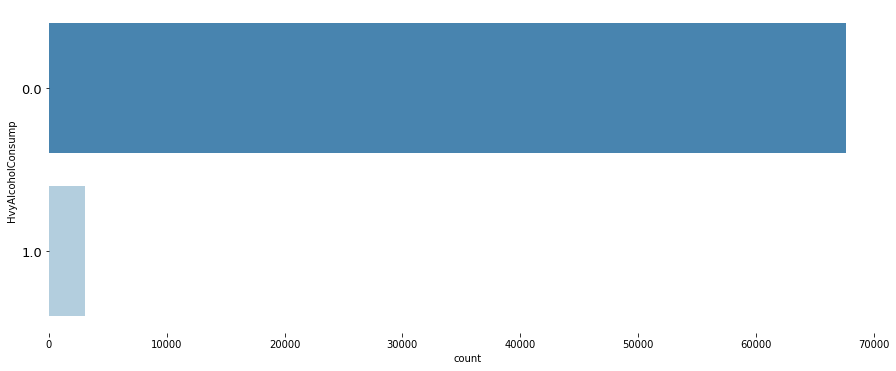

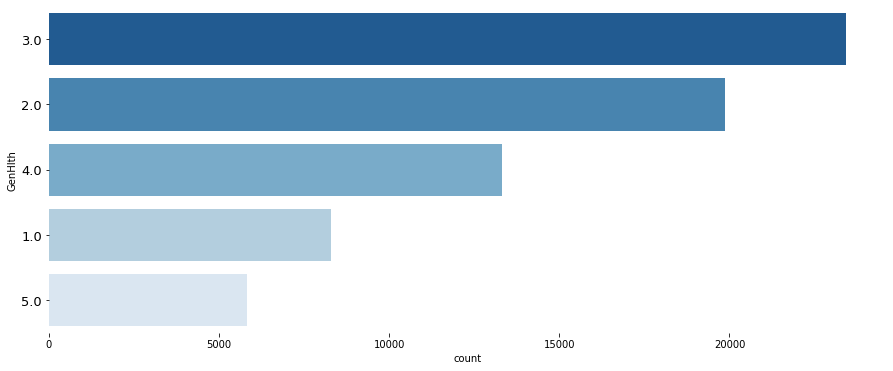

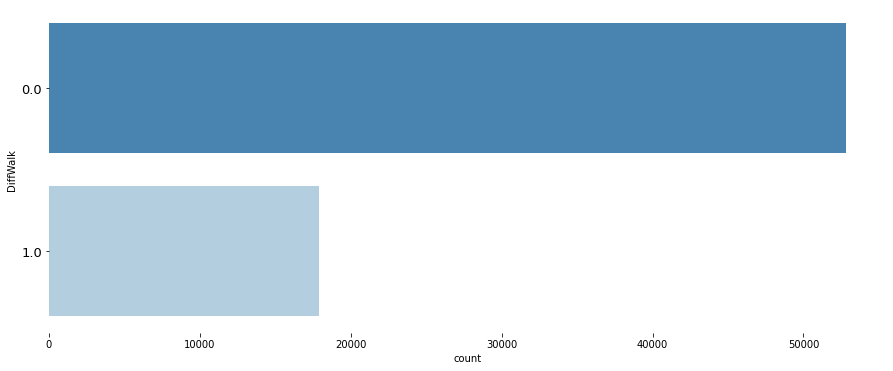

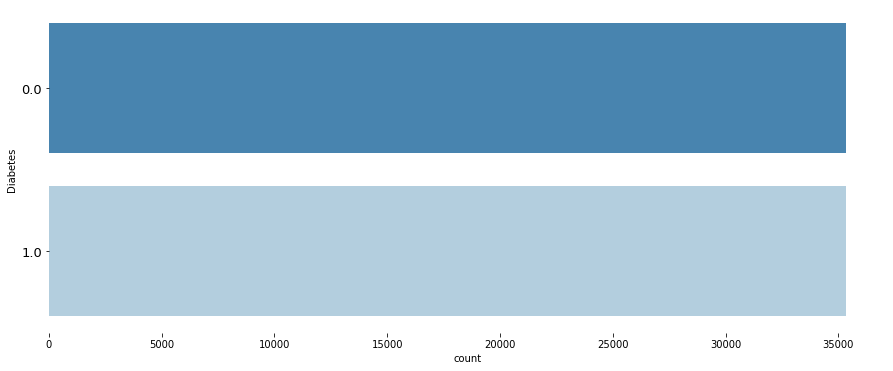

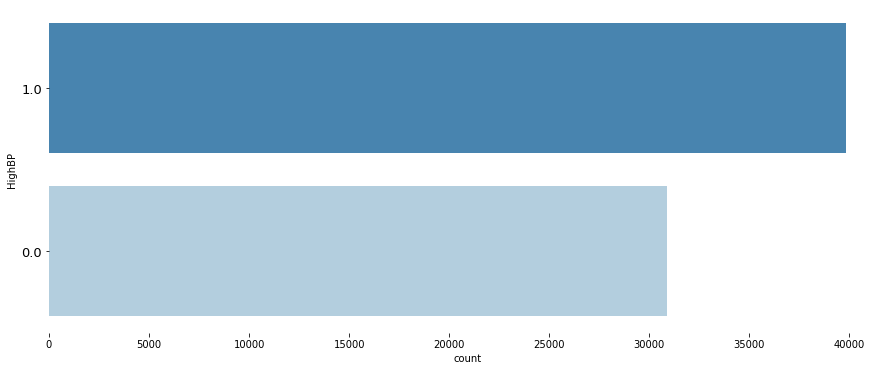

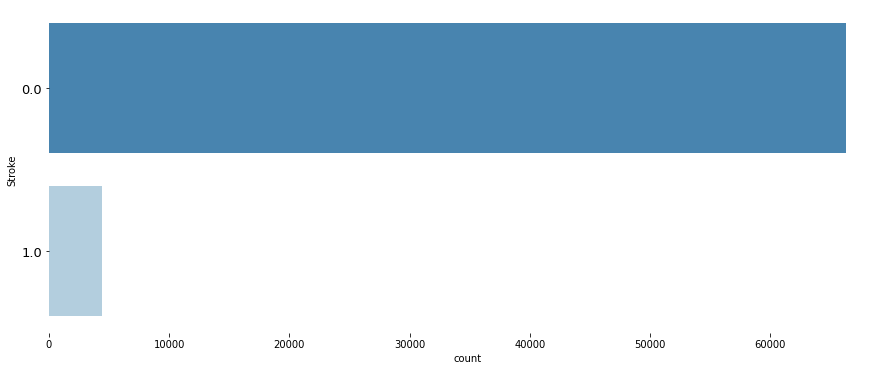

In [8]:


#Presenting the countplots for categorical features
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=13)
  plt.box(False)
  plt.show()



In [9]:
##It can be seen that features like CholCheck and HvyAlcoholConsump are heavily unbalanced and may
##skew or introduce bias in the model thus they will not be considered while building the modeldata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA30AAAFzCAYAAACKH2DgAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAAsTAAALEwEAmpwYAAAVqUlEQVR4nO3de6ykd33f8c/X6xsBX9ZAETUQ7AqVQBPfCxQaBVAcY0WBREQyDWCFSFbapgmNmgYEQlSRS6BXuWlBRokxhiZpIA5JJC4udtqkCRjjG3Ydg29qYmgMBV9oKNdf/5hn0/H2nD3jszM7O999vaTReeaZ5xz/5vz2mfV7n2eeqTFGAAAA6OmodQ8AAACA1RF9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0NjR6x7AMrzs0t8Z6x4DAADQ14ff9Ipa9xh2y5E+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhspdFXVXuq6l9U1Rer6pGq+mBVPekA219QVbdX1deq6raqOn+V4wMAAOhu1Uf63pDk5Umel+Rp07qrttqwqk5P8ttJ3pbkpOnr1VX1zBWPEQAAoK1VR98lSd4+xrhnjPFQkn+a5IKq+u4ttr04yafHGO8bY3xjjPH+JDdO6wEAANiFlUVfVZ2c5BlJPr1v3Rjj7iQPJzlji285Y37byY3bbJuquqSqbqiqG/7sUx9bypgBAAC6WeWRvhOmrw/tt/7BJCdus/2i22aMcfkY49wxxrlPP89b/wAAALayyuh7ZPp60n7rT87saN9W2y+6LQAAAAtYWfSNMR5M8j+SnL1v3XSxlhOT3LrFt9wyv+3krGk9AAAAu7DqC7lcnuQXq+q0qjoxyduTfHSMcd8W2743yblV9aqqOqaqXpXknCRXrniMAAAAba06+n45ye8l+VSS+5PsSfLqJKmqn6iqr+7bcLrIy48leXNmp3S+OcmPbhOIAAAALKDGGOsew0F72aW/s/lPAgAAOGx9+E2vqHWPYbdWfaQPAACANRJ9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABobKHoq6qfq6oTa+ZXq+rGqjp/1YMDAADg4Cx6pO91Y4yHk5yfZG+S1yT55ZWNCgAAgKVYNPpq+nphkqvGGLfPrQMAAOAwVWOMnTequiLJqUlOS3JGkj1J/mCMcc5qhwcAAMDBWDT6jkpyZpJ7xhgPVtUTk5w6xrh1xeMDAADgICx6eudI8pwkPzvdf3yS41cyIgAAAJZm0SN970zynSQvGWN8T1XtTfKxMcZ5qx4gAAAAu3f0gts9b4xxdlXdlCRjjK9U1bErHBcAAABLsOjpnd+sqj2ZneaZqnpyZkf+AAAAOIwtGn2XJbk6yV+rqkuT/FGSt61sVAAAACzFQu/pS5KqenaSl2b2+XwfH2PcscqBAQAAcPAWvZDLVWOM1+y0DgAAgMPLoqd3Pnf+zvT+Ph/MDgAAcJg7YPRV1Rur6pEk31dVD1fVI9P9B5J86JCMEAAAgF1b9PTOt40x3ngIxgMAAMASLRp9RyX5e0lOG2P8UlU9PclTxxjXr3qAAAAA7N6i0ffOzD6X7yVjjO+pqr1JPjbGOG/VAwQAAGD3jl5wu+eNMc6uqpuSZIzxlao6doXjAgAAYAkWvXrnN6crdo4kqaonZ3bkDwAAgMPYotF3WZKrkzylqi5N8kdJ/vnKRgUAAMBSLPSeviSpqmcneel099oxxh0rGxUAAABLseh7+pLku5LsO8XzcasZDgAAAMu00OmdVfWWJFcmOSXJk5JcUVVvXuXAAAAAOHiLfmTDnUnOGGP8n+n+45LcPMb4myseHwAAAAdh0Qu5fD7J8XP3j0ty//KHAwAAwDId8D19VfXvMnsP30NJbq+qa6b7P5jk+tUPDwAAgINxwNM7q+riA33zGOPKpY8IAACApVn4IxsAAADYPAt9ZENVPSvJ25I8J3Pv7RtjnL6icQEAALAEi17I5Yok70zyrSQvTvLeJO9b1aAAAABYjkU/suHTY4xzquozY4zvnV+38hECAACwawud3pnk61V1VJLPVdXPZPZxDU9Y3bAAAABYhkWP9J2X5I4kJyf5pSQnJXnHGOMTKx0dAAAAB8XVOwEAABrb6cPZ/+0Y4/VV9XuZfSj7o4wxfmRlIwMAAOCg7fSevqumr/9y1QMBAABg+RY+vbOqnpwkY4wvrnREu/D7N93rHFUAAGBlfvis02rdY9itHT+nr6reWlVfSnJnks9W1Rer6i2rHxoAAAAH64DRV1U/n+SFSc4bY5wyxtib5HlJXlhV//hQDBAAAIDd2+lI32uSvGqMce++FWOMe5K8OslrVzkwAAAADt5O0XfMGONL+6+c3td3zGqGBAAAwLLsFH3f2OVjAAAAHAZ2+siGM6rq4S3WV5LjVzAeAAAAluiA0TfG2HOoBgIAAMDy7fiRDQAAAGwu0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2tNPqq6qKq+sOqeriqvrXA9udW1fVV9ZdVdXdVvXqV4wMAAOhu1Uf6vpLkPyR5/U4bVtVJST6c5INJ9ib56STvqqoXrHKAAAAAnR29yh8+xvhoklTVDyyw+Y8l+csk7xhjjCTXVNXVSS5J8ierGiMAAEBnh9N7+s5IctMUfPvcOK3//1TVJVV1Q1Xd8JEP/vohGSAAAMCmWemRvsfohCQP7bfuwSQnbrXxGOPyJJcnye/fdO/YahsAAIAj3eF0pO+RJCftt+7kJA8f+qEAAAD0cDhF3y1Jztxv3VnTegAAAHZh1R/ZsKeqjk9y7HT/+OlWW2x+dZLHV9UvVNWxVfXSzC7ucvkqxwgAANDZqo/0vSbJ15J8NMmeaflrSb67qv5uVX21qp6RJGOMB5NcmOTHM3tv37uT/PQYw5U7AQAAdqkefbHMzeRCLgAAwCr98FmnbXW24kY4nN7TBwAAwJKJPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDGRB8AAEBjog8AAKAx0QcAANCY6AMAAGhM9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxmqMse4xAAAAsCKO9AEAADQm+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAAoDHRBwAA0JjoAwAAaEz0AQAANCb6AAAAGhN9AAAAjYk+AACAxkQfAABAY6IPAACgMdEHAADQmOgDAABorEX0VdUl6x4DB8ccbjbzt/nM4eYzh5vPHG4+c7jZOs9fi+hL0naCjiDmcLOZv81nDjefOdx85nDzmcPN1nb+ukQfAAAAWxB9AAAAjXWJvsvXPQAOmjncbOZv85nDzWcON5853HzmcLO1nb8aY6x7DAAAAKxIlyN9AAAAbGGjo6+qLqiqO6vqrqp6w7rHw6NV1X1V9ZmqurmqbpjWnVJV11TV56ave6f1VVWXTXN5a1WdPfdzLp62/1xVXbyu53MkqKpfq6oHquq2uXVLm7OqOmf6M3HX9L11aJ9hf9vM4Vur6v5pX7y5qi6ce+yN03zcWVU/NLd+y9fXqjqtqj45rf/Nqjr20D27/qrq6VV1XVX996q6vap+blpvP9wQB5hD++GGqKrjq+r6qrplmsN/Nq3f8vdeVcdN9++aHn/m3M96THPLwTvA/L2nqu6d2wfPnNYfGa+jY4yNvCXZk+TuJKcnOTbJLUmes+5xuT1qju5L8qT91r0jyRum5Tckefu0fGGSDyepJM9P8slp/SlJ7pm+7p2W9677uXW9Jfn+JGcnuW0Vc5bk+mnbmr73Zet+zt1u28zhW5P8ky22fc702nlcktOm19Q9B3p9TfKfklw0Lb8ryd9f93PudEvy1CRnT8snJPnsNE/2ww25HWAO7Ycbcpv2jSdMy8ck+eS0z2z5e0/yD5K8a1q+KMlv7nZu3VY6f+9J8sottj8iXkc3+Ujf305y1xjjnjHGN5L8RpKXr3lM7OzlSa6clq9M8oq59e8dM59IcnJVPTXJDyW5Zozx5THGV5Jck+SCQzzmI8YY478m+fJ+q5cyZ9NjJ44xPjFmr5jvnftZLMk2c7idlyf5jTHG18cY9ya5K7PX1i1fX6d/yXxJkg9M3z//54ElGGN8YYxx47T8SJI7kpwa++HGOMAcbsd+eJiZ9qevTnePmW4j2//e5/fPDyR56TRPj2luV/usjhwHmL/tHBGvo5scfacm+bO5+3+eA7+ocuiNJB+rqk9X1b4Pu3zKGOML0/L/TPKUaXm7+TTP67esOTt1Wt5/PYfGz0ynrfzavlMD89jn8IlJHhxjfGu/9azAdIrYWZn9K7X9cAPtN4eJ/XBjVNWeqro5yQOZ/c/+3dn+9/5XczU9/lBm8+T/bdZk//kbY+zbBy+d9sF/U1XHTeuOiNfRTY4+Dn8vGmOcneRlSf5hVX3//IPTv464fOwGMWcb651J/kaSM5N8Icm/Wuto2FFVPSHJB5O8fozx8Pxj9sPNsMUc2g83yBjj22OMM5M8LbMjc89e74h4LPafv6r6W0nemNk8npfZKZu/uL4RHnqbHH33J3n63P2nTes4TIwx7p++PpDk6sxeNP9iOiye6esD0+bbzad5Xr9lzdn90/L+61mxMcZfTH8BfifJuzPbF5PHPof/K7PTXo7ebz1LVFXHZBYL7x9j/Pa02n64QbaaQ/vhZhpjPJjkuiQvyPa/97+aq+nxkzKbJ/9vs2Zz83fBdOr1GGN8PckV2f0+uJGvo5scfZ9K8qzpSkrHZvbG2d9d85iYVNXjq+qEfctJzk9yW2ZztO/qRxcn+dC0/LtJXjtdQen5SR6aTmX6aJLzq2rvdCrM+dM6Dp2lzNn02MNV9fzpvQ6vnftZrNC+WJj8aGb7YjKbw4umK8+dluRZmb05fcvX1+kI03VJXjl9//yfB5Zg2jd+NckdY4x/PfeQ/XBDbDeH9sPNUVVPrqqTp+XHJfnBzN6bud3vfX7/fGWSa6d5ekxzu/IndoTYZv7+dO4fziqz9+DN74P9X0e3urrLptwyu9rOZzM7z/pN6x6P26Pm5vTMrkZ1S5Lb981PZue4fzzJ55L85ySnTOsryb+f5vIzSc6d+1mvy+zNz3cl+cl1P7fOtyS/ntlpR9/M7Bz1n1rmnCU5N7MX2buT/EqSWvdz7nbbZg6vmubo1sz+cnvq3PZvmubjzsxdfWy719dp375+mtvfSnLcup9zp1uSF2V26uatSW6ebhfaDzfndoA5tB9uyC3J9yW5aZqr25K85UC/9yTHT/fvmh4/fbdz67bS+bt22gdvS/K+/L8rfB4Rr6M1DRwAAICGNvn0TgAAAHYg+gAAABoTfQAAAI2JPgAAgMZEHwAAQGOiDwAOoap6fVV917rHAcCRw0c2AMAhVFX3ZfY5UF9a91gAODI40gcA+6mq11bVrVV1S1VdVVXPrKprp3Ufr6pnTNu9p6peOfd9X52+/kBV/UFVfaCq/rSq3l8zP5vkrye5rqquW8+zA+BIc/S6BwAAh5Oqem6SNyf5O2OML1XVKUmuTHLlGOPKqnpdksuSvGKHH3VWkucm+XyS/5bkhWOMy6rq55O82JE+AA4VR/oA4NFekuS39kXZGOPLSV6Q5D9Oj1+V5EUL/Jzrxxh/Psb4TpKbkzxz+UMFgJ2JPgDYvW9l+ru0qo5KcuzcY1+fW/52nF0DwJqIPgB4tGuT/HhVPTFJptM7/zjJRdPjP5HkD6fl+5KcMy3/SJJjFvj5jyQ5YVmDBYCd+FdHAJgzxri9qi5N8l+q6ttJbkryj5JcUVW/kOSLSX5y2vzdST5UVbck+UiS/73Af+LyJB+pqs+PMV68/GcAAI/mIxsAAAAac3onAABAY6IPAACgMdEHAADQmOgDAABoTPQBAAA0JvoAAAAaE30AAACNiT4AAIDG/i+qzZXAMrCfaQAAAABJRU5ErkJggg==

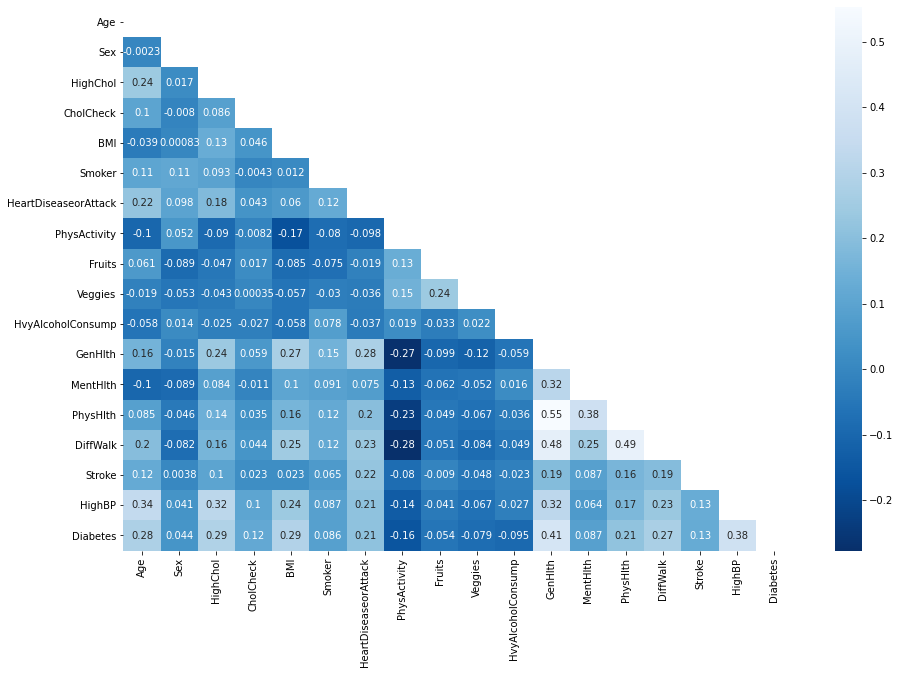

In [10]:
#Building a heatmap using correlation
plt.figure(figsize=(15,10))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='Blues_r')
plt.show()

In [11]:
##Now using this heatmap those features that might not contribute enough to the model depending on 
##their correlation to the target(Stroke) column will be dropped from the dataset


In [12]:
#dropping features that are not required
data=df.drop(['Sex','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','MentHlth'],axis=1)
data.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#splitting the data into input data features and target 
X=data.drop('Stroke',axis=1)
y=data['Stroke']

In [14]:


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)



In [15]:
print(X_train.shape)
print(X_test.shape)

(49484, 10)
(21208, 10)


In [16]:
#scaling the data so that comparatively larger values do not make the model biased
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [17]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

In [18]:
#Defining a function to standardize the model testing process
def model_train_test(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model,X_test_scaled,y_test)

# TESTING DIFFERENT MODELS

### LOGISTIC REGRESSION

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueEr

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.33      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.64      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208



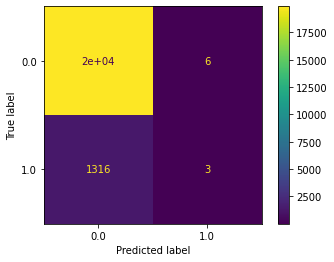

In [21]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg_cv)

### GAUSSIAN NAIVE BAYES


              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     19889
         1.0       0.20      0.48      0.28      1319

    accuracy                           0.85     21208
   macro avg       0.58      0.68      0.60     21208
weighted avg       0.91      0.85      0.88     21208



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


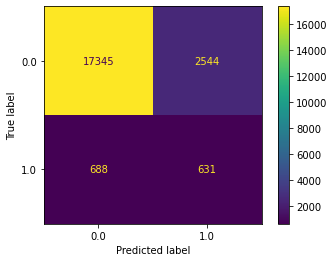

In [23]:
gnb=GaussianNB()
model_train_test(gnb)

###     BERNOULLI NAIVE BAYES

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     19889
         1.0       0.22      0.31      0.26      1319

    accuracy                           0.89     21208
   macro avg       0.59      0.62      0.60     21208
weighted avg       0.91      0.89      0.90     21208



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


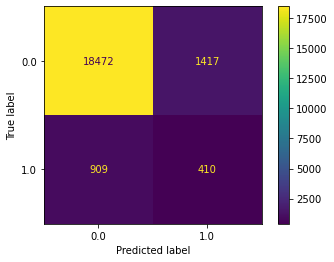

In [25]:
bnb=BernoulliNB()
model_train_test(bnb)

### DECISION TREE



In [27]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [34]:


print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )



{'n_neighbors': 18}
Accuracy for our training dataset with tuning is : 93.73%


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\de

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.00      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.91     21208



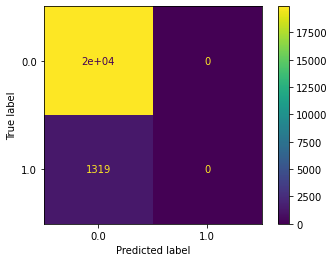

In [35]:
model_train_test(DecisionTreeClassifier(ccp_alpha=0.1,criterion='gini',max_depth=5,max_features='auto'))

### K-NEAREST NEIGHBOURS

In [37]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [38]:


print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )



{'n_neighbors': 18}
Accuracy for our training dataset with tuning is : 93.73%


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.19      0.00      0.01      1319

    accuracy                           0.94     21208
   macro avg       0.57      0.50      0.49     21208
weighted avg       0.89      0.94      0.91     21208



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


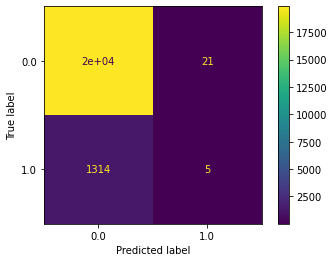

In [39]:


model_train_test(KNeighborsClassifier(n_neighbors=18))

